In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)

# Read data

In [12]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
sample_submit = pd.read_csv("./data/sample_submit.csv")

In [13]:
train.head()

,id,賃料,所在地,アクセス,間取り,築年数,方角,面積,所在階,バス・トイレ,キッチン,放送・通信,室内設備,駐車場,周辺環境,建物構造,契約期間
0,1,75000,東京都北区滝野川３丁目,都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...,1K,9年9ヶ月,南東,20.01m2,1階／12階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\tCATV／\tCSアンテナ／\tBSアンテナ,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,駐輪場\t空有,【小学校】 495m\t【大学】 461m\t【小学校】 962m\t【公園】 1103m\...,RC（鉄筋コンクリート）,2年間
1,2,76000,東京都中央区月島３丁目,都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...,1R,44年10ヶ月,NaN,16.5m2,5階／10階建,専用トイレ／\tシャワー／\t温水洗浄便座,ガスコンロ／\tシステムキッチン\t／\t給湯,インターネット対応,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【スーパー】 1283m,鉄骨造,2年間
2,3,110000,東京都渋谷区笹塚２丁目,京王線\t笹塚駅\t徒歩6分\t\t京王線\t代田橋駅\t徒歩7分\t\t京王線\t明大前駅...,1K,8年6ヶ月,南,22.05m2,12階／15階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\t光ファイバー／\tCSアンテナ／\tBSアンテナ,エアコン付\tウォークインクローゼット\tシューズボックス／\tバルコニー／\tフローリング...,"駐輪場\t空有\tバイク置き場\t空有\t駐車場\t近隣\t30,000円(税込)\t距離100m",【スーパー】 89m\t【コンビニ】 184m\t【コンビニ】 392m\t【スーパー】 492m,RC（鉄筋コンクリート）,2年間
3,4,150000,東京都杉並区高円寺南２丁目23-2,総武線・中央線（各停）\t高円寺駅\t徒歩9分\t\t丸ノ内線(池袋－荻窪)\t新高円寺駅\...,2LDK,29年4ヶ月,南,60.48m2,3階／4階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t温水洗浄便座／\t洗面台独立,ガスコンロ／\t給湯,インターネット対応／\t光ファイバー,エアコン付\tシューズボックス／\tバルコニー／\t2面採光／\t室内洗濯機置場／\tエレベ...,駐車場\t無\t駐輪場\t無\tバイク置き場\t無,【スーパー】 225m\t【スーパー】 448m\t【スーパー】 619m\t【スーパー】 ...,RC（鉄筋コンクリート）,2年間\t※この物件は\t定期借家\tです。
4,5,74000,東京都葛飾区金町３丁目7-2,京成金町線\t京成金町駅\t徒歩5分\t\t常磐線\t金町(東京都)駅\t徒歩7分\t\t京...,2DK,31年7ヶ月,南,39.66m2,1階／2階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能,給湯／\t独立キッチン,NaN,バルコニー／\tフローリング／\t室内洗濯機置場\t公営水道／\t下水,"駐車場\t近隣\t17,000円(税込)\t距離300m\t駐輪場\t無\tバイク置き場\t無",【スーパー】 193m\t【スーパー】 298m\t【スーパー】 660m\t【スーパー】 ...,木造,2年間


In [14]:
test.head()

,id,所在地,アクセス,間取り,築年数,方角,面積,所在階,バス・トイレ,キッチン,放送・通信,室内設備,駐車場,周辺環境,建物構造,契約期間
0,31471,東京都世田谷区深沢５丁目1-27,東急大井町線\t等々力駅\t徒歩15分\t\t東急田園都市線\t桜新町駅\t徒歩24分\t\...,2LDK,49年0ヶ月,南,50.22m2,8階／8階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t温水洗浄便座／...,ガスコンロ／\tコンロ3口／\tシステムキッチン\t／\t給湯／\tL字キッチン,インターネット対応,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\tエレベーター\t公営水...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【コンビニ】 74m\t【スーパー】 215m\t【病院】 313m\t【小学校】 219m...,鉄骨造,NaN
1,31472,東京都目黒区八雲１丁目11-8,東急東横線\t都立大学駅\t徒歩6分\t\t東急東横線\t自由が丘駅\t徒歩17分\t\t東...,1R,0年2ヶ月,南東,20.88m2,3階／4階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\tCSアンテナ／\tBSアンテナ／\tインターネット使用料無料,エアコン付\tシューズボックス／\tフローリング／\t室内洗濯機置場\t公営水道／\t下水／...,"駐車場\t近隣\t34,000円(税込)\t距離200m\t駐輪場\t無\tバイク置き場\t無",【スーパー】 128m\t【スーパー】 313m\t【コンビニ】 374m\t【コンビニ】 ...,RC（鉄筋コンクリート）,2年間
2,31473,東京都豊島区池袋本町２丁目22-2,東武東上線\t北池袋駅\t徒歩10分\t\t埼京線\t板橋駅\t徒歩16分\t\t山手線\t...,1K,23年4ヶ月,南東,26.93m2,1階／4階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t温水洗浄便座,ガスコンロ／\t給湯,インターネット対応／\t光ファイバー／\tCATV,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t2面採光／\t室内洗濯...,"駐車場\t空有\t5,000円(税込)\t(敷金あり\t1ヶ月)\t駐輪場\t空有\tバイク...",【スーパー】 529m\t【スーパー】 810m\t【コンビニ】 316m\t【コンビニ】 ...,鉄骨造,2年間
3,31474,東京都杉並区和泉１丁目,丸ノ内線(中野坂上－方南町)\t方南町駅\t徒歩10分\t\t京王線\t代田橋駅\t徒歩8分...,1K,36年2ヶ月,南東,23.57m2,1階／2階建,シャワー,ガスコンロ／\t給湯,NaN,エアコン付\tシューズボックス／\t2面採光／\t室外洗濯機置場\t公営水道／\t下水／\t...,駐輪場\t空有\t0円,【スーパー】 286m\t【スーパー】 702m\t【コンビニ】 489m\t【コンビニ】 ...,木造,2年間
4,31475,東京都杉並区堀ノ内２丁目,丸ノ内線(中野坂上－方南町)\t方南町駅\t徒歩12分\t\t丸ノ内線(池袋－荻窪)\t新高...,2LDK,45年4ヶ月,南,50m2,4階／4階建,専用バス／\t専用トイレ／\tバス・トイレ別,コンロ設置可（口数不明）／\t給湯,インターネット対応,冷房／\tエアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置...,"駐車場\t近隣\t22,600円\t距離177m",【コンビニ】 312m\t【コンビニ】 436m\t【スーパー】 902m\t【コンビニ】 ...,RC（鉄筋コンクリート）,2年間


# Data shape

In [15]:
print("Training data:", train.shape)
print("Test data:", test.shape)

Training data: (31470, 17)
Test data: (31262, 16)


# EDA

## Target 賃料

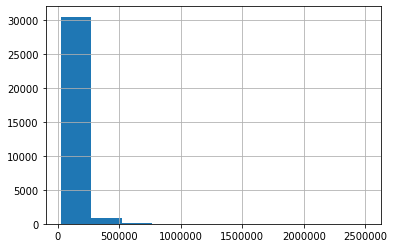

In [16]:
train["賃料"].astype(int).hist();

## Examine Missing Values

In [17]:
train_nans = train[train.isnull().any(axis=1)]
train_nans.shape

(16276, 17)

In [18]:
test_nans = test[test.isnull().any(axis=1)]
test_nans.shape

(16144, 16)

In [19]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [20]:
missing_values = missing_values_table(train)
missing_values

Your selected dataframe has 17 columns.
There are 8 columns that have missing values.


,Missing Values,% of Total Values
周辺環境,9432,30.0
契約期間,7120,22.6
駐車場,5287,16.8
放送・通信,3440,10.9
方角,2749,8.7
キッチン,621,2.0
バス・トイレ,329,1.0
室内設備,82,0.3


## Column Types

In [21]:
train.dtypes

id         int64
賃料         int64
所在地       object
アクセス      object
間取り       object
築年数       object
方角        object
面積        object
所在階       object
バス・トイレ    object
キッチン      object
放送・通信     object
室内設備      object
駐車場       object
周辺環境      object
建物構造      object
契約期間      object
dtype: object

In [22]:
train.dtypes.value_counts()

object    15
int64      2
dtype: int64

In [23]:
train.select_dtypes("object").apply(pd.Series.nunique, axis=0)

所在地       11333
アクセス      24172
間取り          30
築年数         746
方角            8
面積         5739
所在階        1032
バス・トイレ      360
キッチン        381
放送・通信       139
室内設備       6220
駐車場        3911
周辺環境      17864
建物構造         10
契約期間         66
dtype: int64

There are shit ton of categorical values shoved inside every column.

# Concatenate train and test

In [24]:
target = train["賃料"]
total_data = pd.concat([train.drop(columns="賃料"), test], ignore_index=True)
total_id = total_data["id"]
total_data = total_data.drop(columns="id")
total_data.shape

(62732, 15)

In [25]:
total_data.columns

Index(['所在地', 'アクセス', '間取り', '築年数', '方角', '面積', '所在階', 'バス・トイレ', 'キッチン', '放送・通信', '室内設備', '駐車場', '周辺環境', '建物構造', '契約期間'], dtype='object')

In [26]:
total_data

,所在地,アクセス,間取り,築年数,方角,面積,所在階,バス・トイレ,キッチン,放送・通信,室内設備,駐車場,周辺環境,建物構造,契約期間
0,東京都北区滝野川３丁目,都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...,1K,9年9ヶ月,南東,20.01m2,1階／12階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\tCATV／\tCSアンテナ／\tBSアンテナ,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,駐輪場\t空有,【小学校】 495m\t【大学】 461m\t【小学校】 962m\t【公園】 1103m\...,RC（鉄筋コンクリート）,2年間
1,東京都中央区月島３丁目,都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...,1R,44年10ヶ月,NaN,16.5m2,5階／10階建,専用トイレ／\tシャワー／\t温水洗浄便座,ガスコンロ／\tシステムキッチン\t／\t給湯,インターネット対応,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【スーパー】 1283m,鉄骨造,2年間
2,東京都渋谷区笹塚２丁目,京王線\t笹塚駅\t徒歩6分\t\t京王線\t代田橋駅\t徒歩7分\t\t京王線\t明大前駅...,1K,8年6ヶ月,南,22.05m2,12階／15階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\t光ファイバー／\tCSアンテナ／\tBSアンテナ,エアコン付\tウォークインクローゼット\tシューズボックス／\tバルコニー／\tフローリング...,"駐輪場\t空有\tバイク置き場\t空有\t駐車場\t近隣\t30,000円(税込)\t距離100m",【スーパー】 89m\t【コンビニ】 184m\t【コンビニ】 392m\t【スーパー】 492m,RC（鉄筋コンクリート）,2年間
3,東京都杉並区高円寺南２丁目23-2,総武線・中央線（各停）\t高円寺駅\t徒歩9分\t\t丸ノ内線(池袋－荻窪)\t新高円寺駅\...,2LDK,29年4ヶ月,南,60.48m2,3階／4階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t温水洗浄便座／\t洗面台独立,ガスコンロ／\t給湯,インターネット対応／\t光ファイバー,エアコン付\tシューズボックス／\tバルコニー／\t2面採光／\t室内洗濯機置場／\tエレベ...,駐車場\t無\t駐輪場\t無\tバイク置き場\t無,【スーパー】 225m\t【スーパー】 448m\t【スーパー】 619m\t【スーパー】 ...,RC（鉄筋コンクリート）,2年間\t※この物件は\t定期借家\tです。
4,東京都葛飾区金町３丁目7-2,京成金町線\t京成金町駅\t徒歩5分\t\t常磐線\t金町(東京都)駅\t徒歩7分\t\t京...,2DK,31年7ヶ月,南,39.66m2,1階／2階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能,給湯／\t独立キッチン,NaN,バルコニー／\tフローリング／\t室内洗濯機置場\t公営水道／\t下水,"駐車場\t近隣\t17,000円(税込)\t距離300m\t駐輪場\t無\tバイク置き場\t無",【スーパー】 193m\t【スーパー】 298m\t【スーパー】 660m\t【スーパー】 ...,木造,2年間
5,東京都荒川区南千住５丁目,常磐線快速\t南千住駅\t徒歩2分\t\t都電荒川線\t三ノ輪橋駅\t徒歩10分\t\t日比...,2LDK,7年6ヶ月,東,50.8m2,6階／12階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...,ガスコンロ／\tコンロ3口／\tシステムキッチン\t／\t給湯／\t独立キッチン,インターネット対応／\t光ファイバー,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t24時間換気システム\...,"駐輪場\t空有\t駐車場\t近隣\t27,000円(税込)\t距離150m\tバイク置き場\t無",【スーパー】 251m\t【コンビニ】 376m,RC（鉄筋コンクリート）,2年間
6,東京都練馬区東大泉３丁目,西武池袋線\t大泉学園駅\t徒歩4分\t\t西武池袋線\t保谷駅\t徒歩25分\t\t東武東...,1K,10年5ヶ月,南,23.82m2,6階／8階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\t光ファイバー／\tCATV／\tBSアンテナ,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t24時間換気システム\...,"駐輪場\t空有\t駐車場\t近隣\t16,000円(税込)\t距離200m\tバイク置き場\t無",【スーパー】 812m\t【コンビニ】 149m\t【コンビニ】 942m\t【スーパー】 ...,RC（鉄筋コンクリート）,2年間
7,東京都目黒区鷹番１丁目,東急東横線\t学芸大学駅\t徒歩7分\t\t東急東横線\t都立大学駅\t徒歩16分\t\t東...,1K,14年4ヶ月,NaN,32.32m2,1階／6階建,専用バス／\t専用トイレ／\tバス・トイレ別／\t追焚機能／\t浴室乾燥機\t／\t温水洗浄...,ガスコンロ／\tコンロ2口／\tシステムキッチン,光ファイバー／\tCATV／\tCSアンテナ／\tBSアンテナ,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t24時間換気システム\...,NaN,【スーパー】 334m\t【スーパー】 562m\t【スーパー】 694m\t【コンビニ】 ...,RC（鉄筋コンクリート）,2年間
8,東京都文京区向丘１丁目,南北線\t東大前駅\t徒歩3分\t\t都営三田線\t白山(東京都)駅\t徒歩10分\t\t千...,2DK,44年8ヶ月,北西,65.59m2,4階／9階建,専用バス／\t専用トイレ／\tバス・トイレ別／\t追焚機能／\t洗面台独立,ガスコンロ／\tコンロ3口／\tシステムキッチン\t／\t給湯,NaN,エアコン付\tバルコニー／\tフローリング／\t室内洗濯機置場\t公営水道／\t都市ガス,駐車場\t無,NaN,SRC（鉄骨鉄筋コンクリート）,2年間
9,東京都板橋区板橋４丁目,埼京線\t板橋駅\t徒歩8分\t\t都営三田線\t新板橋駅\t徒歩4分\t\t東武東上線\t...,1DK,38年9ヶ月,南東,30.3m2,2階／3階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t洗面台独立,ガスコンロ／\tコンロ2口／\t給湯,光ファイバー／\tCATV,エアコン付\tバルコニー／\tフローリング／\t室内洗濯機置場\t公営水道／\t都市ガス,駐車場\t無,NaN,鉄骨造,2年間


# Delete some columns 

In [27]:
# total_data.columns

In [28]:
# total_data = total_data.drop(columns=["アクセス", "バス・トイレ", "キッチン", "放送・通信", "駐車場", "周辺環境"])

# Convert 全角 to 半角

In [29]:
for column in total_data.columns:
    if column == "id":
        pass
    else:
        print(column)
        total_data[column] = total_data[column].str.translate(str.maketrans({chr(0xFF01 + i): chr(0x21 + i) for i in range(94)}))

所在地
アクセス
間取り
築年数
方角
面積
所在階
バス・トイレ
キッチン
放送・通信
室内設備
駐車場
周辺環境
建物構造
契約期間


## Convert 築年数

## Replace 新築

In [30]:
total_data["築年数"].nunique()

771

In [31]:
total_data["築年数"].str.split("年", expand=True).head()

,0,1
0,9,9ヶ月
1,44,10ヶ月
2,8,6ヶ月
3,29,4ヶ月
4,31,7ヶ月


In [32]:
total_data["築年数"] = total_data["築年数"].replace("新築", "0年0ヶ月")
total_data["築年数_0"] = total_data["築年数"].str.split("年", expand=True)[0].astype(int)
total_data["築年数_1"] = total_data["築年数"].str.split("年", expand=True)[1].str.replace("ヶ月", "").astype(int)
total_data = total_data.drop("築年数", axis=1)
total_data["築年数_月"] = total_data["築年数_0"] * 12 + total_data["築年数_1"]
total_data = total_data.drop(columns=["築年数_0","築年数_1"])

In [33]:
total_data["築年数_月"][:5]

0    117
1    538
2    102
3    352
4    379
Name: 築年数_月, dtype: int64

# 方角EDA

In [34]:
total_data["方角"].unique()

array(['南東', nan, '南', '東', '北西', '西', '北', '南西', '北東'], dtype=object)

## 面積EDA

In [35]:
total_data["面積"] = total_data["面積"].str.replace("m2", "").astype(np.float)

In [36]:
total_data["面積"][:5]

0    20.01
1    16.50
2    22.05
3    60.48
4    39.66
Name: 面積, dtype: float64

# 所在階

In [37]:
total_data["所在階"][:5]

0     1階/12階建
1     5階/10階建
2    12階/15階建
3      3階/4階建
4      1階/2階建
Name: 所在階, dtype: object

In [38]:
total_data["所在階"][total_data["所在階"].isna()]

40674    NaN
Name: 所在階, dtype: object

In [39]:
total_data["所在階"] = total_data["所在階"].fillna("0")

In [40]:
total_data["所在階"][~total_data["所在階"].str.contains("/")] = "/" + total_data["所在階"][~total_data["所在階"].str.contains("/")]

/home/amar/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
# total_data["所在階"].str.split("/", expand=True)[1].str.split("(", expand=True)[1].str.rstrip(")").unique()
total_data["階建"] = total_data["所在階"].str.split("/", expand=True)[1]
total_data["所在階"] = total_data["所在階"].str.split("/", expand=True)[0]

In [42]:
total_data["所在階"] = total_data["所在階"].str.replace("階", "")

In [43]:
total_data["所在階_地下"] = total_data["所在階"].str.split("地下", expand=True)[1]

In [44]:
total_data["所在階_地下"].unique()

array([None, '4', '2', '1', '3', '8', '9', '10', '7', '15', '5', '6'],
      dtype=object)

In [45]:
total_data["所在階"] = total_data["所在階"].str.split("地下", expand=True)[0]

In [46]:
total_data["所在階"] = total_data["所在階"].replace("", 0).astype(int)

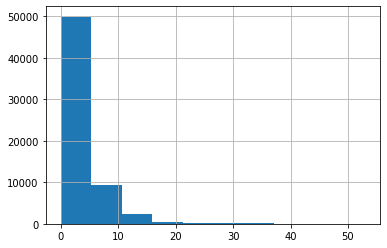

In [47]:
total_data["所在階"].hist()

In [48]:
total_data["所在階_地下"] = total_data["所在階_地下"].fillna(0).astype(int)

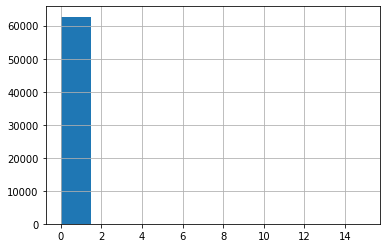

In [49]:
total_data["所在階_地下"].hist()

In [50]:
total_data["階建"].unique()

array(['12階建', '10階建', '15階建', '4階建', '2階建', '8階建', '6階建', '9階建', '3階建',
       '11階建', '5階建', '42階建', '11階建(地下1階)', '7階建', '7階建(地下1階)',
       '4階建(地下2階)', '13階建', '14階建', '19階建', '22階建', '18階建', '14階建(地下1階)',
       '12階建(地下1階)', '13階建(地下2階)', '3階建(地下1階)', '15階建(地下1階)',
       '32階建(地下2階)', '16階建', '58階建(地下2階)', '38階建(地下2階)', '54階建', '58階建',
       '43階建', '16階建(地下2階)', '10階建(地下1階)', '4階建(地下1階)', '8階建(地下1階)',
       '5階建(地下1階)', '6階建(地下1階)', '17階建', '53階建', '25階建', '24階建',
       '17階建(地下1階)', '21階建', '28階建(地下1階)', '43階建(地下3階)', '10階建(地下5階)',
       '22階建(地下1階)', '2階建(地下1階)', '27階建(地下1階)', '9階建(地下1階)', '14階建(地下2階)',
       '23階建', '27階建', '28階建(地下2階)', '25階建(地下2階)', '1階建', '39階建(地下1階)',
       '33階建(地下2階)', '50階建', '10階建(地下2階)', '41階建', '40階建(地下1階)',
       '2階建(地下2階)', '39階建(地下2階)', '30階建', '34階建(地下2階)', '2階',
       '36階建(地下2階)', '15階建(地下2階)', '35階建', '47階建', '19階建(地下2階)', '20階建',
       '36階建', '20階建(地下1階)', '26階建(地下1階)', '44階建', '3階', '37階建(地下1階)',
       '49階建', '33階建', '25階建(地下

In [51]:
total_data["階建"] = total_data["階建"].str.replace("階建", "")
total_data["階建"] = total_data["階建"].str.replace("階", "")

In [52]:
total_data["階建_地下"] = total_data["階建"].str.split("(", expand=True)[1]
total_data["階建"] = total_data["階建"].str.split("(", expand=True)[0].astype(int)

In [53]:
total_data["階建_地下"] = total_data["階建_地下"].str.replace("地下", "").str.replace(")", "").fillna(0).astype(int)

In [54]:
total_data.head()

,所在地,アクセス,間取り,方角,面積,所在階,バス・トイレ,キッチン,放送・通信,室内設備,駐車場,周辺環境,建物構造,契約期間,築年数_月,階建,所在階_地下,階建_地下
0,東京都北区滝野川3丁目,都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...,1K,南東,20.01,1,専用バス/\t専用トイレ/\tバス・トイレ別/\tシャワー/\t浴室乾燥機\t/\t温水洗浄便座,ガスコンロ/\tコンロ2口/\tシステムキッチン\t/\t給湯,インターネット対応/\tCATV/\tCSアンテナ/\tBSアンテナ,エアコン付\tシューズボックス/\tバルコニー/\tフローリング/\t室内洗濯機置場/\t敷...,駐輪場\t空有,【小学校】 495m\t【大学】 461m\t【小学校】 962m\t【公園】 1103m\...,RC(鉄筋コンクリート),2年間,117,12,0,0
1,東京都中央区月島3丁目,都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...,1R,NaN,16.50,5,専用トイレ/\tシャワー/\t温水洗浄便座,ガスコンロ/\tシステムキッチン\t/\t給湯,インターネット対応,エアコン付\tシューズボックス/\tバルコニー/\tフローリング/\t室内洗濯機置場/\t敷...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【スーパー】 1283m,鉄骨造,2年間,538,10,0,0
2,東京都渋谷区笹塚2丁目,京王線\t笹塚駅\t徒歩6分\t\t京王線\t代田橋駅\t徒歩7分\t\t京王線\t明大前駅...,1K,南,22.05,12,専用バス/\t専用トイレ/\tバス・トイレ別/\tシャワー/\t浴室乾燥機\t/\t温水洗浄...,ガスコンロ/\tコンロ2口/\tシステムキッチン\t/\t給湯,インターネット対応/\t光ファイバー/\tCSアンテナ/\tBSアンテナ,エアコン付\tウォークインクローゼット\tシューズボックス/\tバルコニー/\tフローリング...,"駐輪場\t空有\tバイク置き場\t空有\t駐車場\t近隣\t30,000円(税込)\t距離100m",【スーパー】 89m\t【コンビニ】 184m\t【コンビニ】 392m\t【スーパー】 492m,RC(鉄筋コンクリート),2年間,102,15,0,0
3,東京都杉並区高円寺南2丁目23-2,総武線・中央線(各停)\t高円寺駅\t徒歩9分\t\t丸ノ内線(池袋-荻窪)\t新高円寺駅\...,2LDK,南,60.48,3,専用バス/\t専用トイレ/\tバス・トイレ別/\tシャワー/\t温水洗浄便座/\t洗面台独立,ガスコンロ/\t給湯,インターネット対応/\t光ファイバー,エアコン付\tシューズボックス/\tバルコニー/\t2面採光/\t室内洗濯機置場/\tエレベ...,駐車場\t無\t駐輪場\t無\tバイク置き場\t無,【スーパー】 225m\t【スーパー】 448m\t【スーパー】 619m\t【スーパー】 ...,RC(鉄筋コンクリート),2年間\t※この物件は\t定期借家\tです。,352,4,0,0
4,東京都葛飾区金町3丁目7-2,京成金町線\t京成金町駅\t徒歩5分\t\t常磐線\t金町(東京都)駅\t徒歩7分\t\t京...,2DK,南,39.66,1,専用バス/\t専用トイレ/\tバス・トイレ別/\tシャワー/\t追焚機能,給湯/\t独立キッチン,NaN,バルコニー/\tフローリング/\t室内洗濯機置場\t公営水道/\t下水,"駐車場\t近隣\t17,000円(税込)\t距離300m\t駐輪場\t無\tバイク置き場\t無",【スーパー】 193m\t【スーパー】 298m\t【スーパー】 660m\t【スーパー】 ...,木造,2年間,379,2,0,0


In [55]:
for i in total_data.columns:
    print(i + ":")
    print(total_data[i].nunique())

所在地:
16194
アクセス:
42990
間取り:
38
方角:
8
面積:
6721
所在階:
52
バス・トイレ:
404
キッチン:
447
放送・通信:
150
室内設備:
9293
駐車場:
5926
周辺環境:
32674
建物構造:
11
契約期間:
79
築年数_月:
770
階建:
57
所在階_地下:
12
階建_地下:
10


# 間取り

In [56]:
total_data["間取り"].str.split("(", expand=True)[0].unique()

array(['1K', '1R', '2LDK', '2DK', '1DK', '1LDK', '3LDK', '3DK', '1LDK+S',
       '4K', '2K', '1K+S', '4LDK', '3LDK+S', '5LDK+S', '5LDK', '3K',
       '4DK', '2LDK+S', '2DK+S', '4LDK+S', '5DK', '3DK+S', '1DK+S', '5K',
       '6LDK', '2K+S', '1LK+S', '5DK+S', '3K+S', '8LDK', '6LDK+S', '11R',
       '6K', '6DK', '4DK+S', '2R', '1LK'], dtype=object)

In [57]:
total_data["間取り"].str.split("(", expand=True)[1].unique()

array([None, '納戸)'], dtype=object)

In [58]:
total_data["納戸"] = total_data["間取り"].str.split("(", expand=True)[1]

In [59]:
total_data["納戸"] = total_data["納戸"].replace("納戸)", 1).fillna(0).astype(int)

In [60]:
total_data["納戸"].unique()

array([0, 1])

In [61]:
total_data["間取り"] = total_data["間取り"].str.split("(", expand=True)[0]

In [62]:
total_data["間取り_S"] = total_data["間取り"].str.split("+", expand=True)[1]
total_data["間取り"] = total_data["間取り"].str.split("+", expand=True)[0]

In [63]:
total_data["間取り_S"] = total_data["間取り_S"].replace("S", 1).fillna(0).astype(int)

In [64]:
total_data["間取り_K"] = total_data["間取り"].str.split("K", expand=True)[1].replace("", 1).fillna(0).astype(int)
total_data["間取り"] = total_data["間取り"].str.split("K", expand=True)[0]

In [65]:
total_data["間取り_D"] = total_data["間取り"].str.split("D", expand=True)[1].replace("", 1).fillna(0).astype(int)
total_data["間取り"] = total_data["間取り"].str.split("D", expand=True)[0]

In [66]:
total_data["間取り_L"] = total_data["間取り"].str.split("L", expand=True)[1].replace("", 1).fillna(0).astype(int)
total_data["間取り"] = total_data["間取り"].str.split("L", expand=True)[0]

In [67]:
total_data["間取り_R"] = total_data["間取り"].str.split("R", expand=True)[1].replace("", 1).fillna(0).astype(int)
total_data["間取り"] = total_data["間取り"].str.split("R", expand=True)[0].astype(int)

In [68]:
total_data.head(2)

,所在地,アクセス,間取り,方角,面積,所在階,バス・トイレ,キッチン,放送・通信,室内設備,駐車場,周辺環境,建物構造,契約期間,築年数_月,階建,所在階_地下,階建_地下,納戸,間取り_S,間取り_K,間取り_D,間取り_L,間取り_R
0,東京都北区滝野川3丁目,都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...,1,南東,20.01,1,専用バス/\t専用トイレ/\tバス・トイレ別/\tシャワー/\t浴室乾燥機\t/\t温水洗浄便座,ガスコンロ/\tコンロ2口/\tシステムキッチン\t/\t給湯,インターネット対応/\tCATV/\tCSアンテナ/\tBSアンテナ,エアコン付\tシューズボックス/\tバルコニー/\tフローリング/\t室内洗濯機置場/\t敷...,駐輪場\t空有,【小学校】 495m\t【大学】 461m\t【小学校】 962m\t【公園】 1103m\...,RC(鉄筋コンクリート),2年間,117,12,0,0,0,0,1,0,0,0
1,東京都中央区月島3丁目,都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...,1,NaN,16.50,5,専用トイレ/\tシャワー/\t温水洗浄便座,ガスコンロ/\tシステムキッチン\t/\t給湯,インターネット対応,エアコン付\tシューズボックス/\tバルコニー/\tフローリング/\t室内洗濯機置場/\t敷...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【スーパー】 1283m,鉄骨造,2年間,538,10,0,0,0,0,0,0,0,1


# 方角

In [69]:
total_data["方角"].head(10)

0     南東
1    NaN
2      南
3      南
4      南
5      東
6      南
7    NaN
8     北西
9     南東
Name: 方角, dtype: object

In [70]:
total_data["方角"].unique()

array(['南東', nan, '南', '東', '北西', '西', '北', '南西', '北東'], dtype=object)

In [71]:
total_data["方角_南"] = total_data["方角"].isin(["南", "南東", "南西"]).astype(int)
total_data["方角_東"] = total_data["方角"].isin(["東", "南東", "北東"]).astype(int)
total_data["方角_西"] = total_data["方角"].isin(["西", "南西", "北西"]).astype(int)
total_data["方角_北"] = total_data["方角"].isin(["北", "北東", "北西"]).astype(int)

In [72]:
total_data.head()

,所在地,アクセス,間取り,方角,面積,所在階,バス・トイレ,キッチン,放送・通信,室内設備,駐車場,周辺環境,建物構造,契約期間,築年数_月,階建,所在階_地下,階建_地下,納戸,間取り_S,間取り_K,間取り_D,間取り_L,間取り_R,方角_南,方角_東,方角_西,方角_北
0,東京都北区滝野川3丁目,都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...,1,南東,20.01,1,専用バス/\t専用トイレ/\tバス・トイレ別/\tシャワー/\t浴室乾燥機\t/\t温水洗浄便座,ガスコンロ/\tコンロ2口/\tシステムキッチン\t/\t給湯,インターネット対応/\tCATV/\tCSアンテナ/\tBSアンテナ,エアコン付\tシューズボックス/\tバルコニー/\tフローリング/\t室内洗濯機置場/\t敷...,駐輪場\t空有,【小学校】 495m\t【大学】 461m\t【小学校】 962m\t【公園】 1103m\...,RC(鉄筋コンクリート),2年間,117,12,0,0,0,0,1,0,0,0,1,1,0,0
1,東京都中央区月島3丁目,都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...,1,NaN,16.50,5,専用トイレ/\tシャワー/\t温水洗浄便座,ガスコンロ/\tシステムキッチン\t/\t給湯,インターネット対応,エアコン付\tシューズボックス/\tバルコニー/\tフローリング/\t室内洗濯機置場/\t敷...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【スーパー】 1283m,鉄骨造,2年間,538,10,0,0,0,0,0,0,0,1,0,0,0,0
2,東京都渋谷区笹塚2丁目,京王線\t笹塚駅\t徒歩6分\t\t京王線\t代田橋駅\t徒歩7分\t\t京王線\t明大前駅...,1,南,22.05,12,専用バス/\t専用トイレ/\tバス・トイレ別/\tシャワー/\t浴室乾燥機\t/\t温水洗浄...,ガスコンロ/\tコンロ2口/\tシステムキッチン\t/\t給湯,インターネット対応/\t光ファイバー/\tCSアンテナ/\tBSアンテナ,エアコン付\tウォークインクローゼット\tシューズボックス/\tバルコニー/\tフローリング...,"駐輪場\t空有\tバイク置き場\t空有\t駐車場\t近隣\t30,000円(税込)\t距離100m",【スーパー】 89m\t【コンビニ】 184m\t【コンビニ】 392m\t【スーパー】 492m,RC(鉄筋コンクリート),2年間,102,15,0,0,0,0,1,0,0,0,1,0,0,0
3,東京都杉並区高円寺南2丁目23-2,総武線・中央線(各停)\t高円寺駅\t徒歩9分\t\t丸ノ内線(池袋-荻窪)\t新高円寺駅\...,2,南,60.48,3,専用バス/\t専用トイレ/\tバス・トイレ別/\tシャワー/\t温水洗浄便座/\t洗面台独立,ガスコンロ/\t給湯,インターネット対応/\t光ファイバー,エアコン付\tシューズボックス/\tバルコニー/\t2面採光/\t室内洗濯機置場/\tエレベ...,駐車場\t無\t駐輪場\t無\tバイク置き場\t無,【スーパー】 225m\t【スーパー】 448m\t【スーパー】 619m\t【スーパー】 ...,RC(鉄筋コンクリート),2年間\t※この物件は\t定期借家\tです。,352,4,0,0,0,0,1,1,1,0,1,0,0,0
4,東京都葛飾区金町3丁目7-2,京成金町線\t京成金町駅\t徒歩5分\t\t常磐線\t金町(東京都)駅\t徒歩7分\t\t京...,2,南,39.66,1,専用バス/\t専用トイレ/\tバス・トイレ別/\tシャワー/\t追焚機能,給湯/\t独立キッチン,NaN,バルコニー/\tフローリング/\t室内洗濯機置場\t公営水道/\t下水,"駐車場\t近隣\t17,000円(税込)\t距離300m\t駐輪場\t無\tバイク置き場\t無",【スーパー】 193m\t【スーパー】 298m\t【スーパー】 660m\t【スーパー】 ...,木造,2年間,379,2,0,0,0,0,1,1,0,0,1,0,0,0


In [62]:
total_data = total_data.drop(columns = "方角")

In [63]:
total_data["建物構造"].unique()

array(['RC(鉄筋コンクリート)', '鉄骨造', '木造', 'SRC(鉄骨鉄筋コンクリート)', '軽量鉄骨',
       'ALC(軽量気泡コンクリート)', 'その他', 'PC(プレキャスト・コンクリート(鉄筋コンクリート))',
       'HPC(プレキャスト・コンクリート(重量鉄骨))', 'ブロック', '鉄筋ブロック'], dtype=object)

In [64]:
total_data.select_dtypes("object").head()

,所在地,アクセス,バス・トイレ,キッチン,放送・通信,室内設備,駐車場,周辺環境,建物構造,契約期間
0,東京都北区滝野川3丁目,都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...,専用バス/\t専用トイレ/\tバス・トイレ別/\tシャワー/\t浴室乾燥機\t/\t温水洗浄便座,ガスコンロ/\tコンロ2口/\tシステムキッチン\t/\t給湯,インターネット対応/\tCATV/\tCSアンテナ/\tBSアンテナ,エアコン付\tシューズボックス/\tバルコニー/\tフローリング/\t室内洗濯機置場/\t敷...,駐輪場\t空有,【小学校】 495m\t【大学】 461m\t【小学校】 962m\t【公園】 1103m\...,RC(鉄筋コンクリート),2年間
1,東京都中央区月島3丁目,都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...,専用トイレ/\tシャワー/\t温水洗浄便座,ガスコンロ/\tシステムキッチン\t/\t給湯,インターネット対応,エアコン付\tシューズボックス/\tバルコニー/\tフローリング/\t室内洗濯機置場/\t敷...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【スーパー】 1283m,鉄骨造,2年間
2,東京都渋谷区笹塚2丁目,京王線\t笹塚駅\t徒歩6分\t\t京王線\t代田橋駅\t徒歩7分\t\t京王線\t明大前駅...,専用バス/\t専用トイレ/\tバス・トイレ別/\tシャワー/\t浴室乾燥機\t/\t温水洗浄...,ガスコンロ/\tコンロ2口/\tシステムキッチン\t/\t給湯,インターネット対応/\t光ファイバー/\tCSアンテナ/\tBSアンテナ,エアコン付\tウォークインクローゼット\tシューズボックス/\tバルコニー/\tフローリング...,"駐輪場\t空有\tバイク置き場\t空有\t駐車場\t近隣\t30,000円(税込)\t距離100m",【スーパー】 89m\t【コンビニ】 184m\t【コンビニ】 392m\t【スーパー】 492m,RC(鉄筋コンクリート),2年間
3,東京都杉並区高円寺南2丁目23-2,総武線・中央線(各停)\t高円寺駅\t徒歩9分\t\t丸ノ内線(池袋-荻窪)\t新高円寺駅\...,専用バス/\t専用トイレ/\tバス・トイレ別/\tシャワー/\t温水洗浄便座/\t洗面台独立,ガスコンロ/\t給湯,インターネット対応/\t光ファイバー,エアコン付\tシューズボックス/\tバルコニー/\t2面採光/\t室内洗濯機置場/\tエレベ...,駐車場\t無\t駐輪場\t無\tバイク置き場\t無,【スーパー】 225m\t【スーパー】 448m\t【スーパー】 619m\t【スーパー】 ...,RC(鉄筋コンクリート),2年間\t※この物件は\t定期借家\tです。
4,東京都葛飾区金町3丁目7-2,京成金町線\t京成金町駅\t徒歩5分\t\t常磐線\t金町(東京都)駅\t徒歩7分\t\t京...,専用バス/\t専用トイレ/\tバス・トイレ別/\tシャワー/\t追焚機能,給湯/\t独立キッチン,NaN,バルコニー/\tフローリング/\t室内洗濯機置場\t公営水道/\t下水,"駐車場\t近隣\t17,000円(税込)\t距離300m\t駐輪場\t無\tバイク置き場\t無",【スーパー】 193m\t【スーパー】 298m\t【スーパー】 660m\t【スーパー】 ...,木造,2年間


# 契約期間

In [65]:
total_data["契約期間_定期借家"] = total_data["契約期間"].str.split("\t", expand=True)[2].replace("定期借家", 1).fillna(0).astype(int)

In [66]:
total_data["契約期間"] = total_data["契約期間"].str.split("\t", expand=True)[0]

In [67]:
total_data["契約期間"] = total_data["契約期間"].str.replace("ヶ", "")
total_data["契約期間"].unique()

array(['2年間', nan, '1年間', '5年間', '3年間', '2月間', '4年間', '2021年4月まで',
       '2023年3月まで', '2022年3月まで', '2021年8月まで', '1月間', '2020年3月まで',
       '2021年2月まで', '22年間', '12年間', '2020年6月まで', '4年8月間', '2021年7月まで',
       '2022年6月まで', '2021年3月まで', '2021年12月まで', '3年3月間', '2022年7月まで',
       '2年6月間', '2022年2月まで', '1年10月間', '2023年8月まで', '2020年5月まで', '7年間',
       '10年間', '2021年1月まで', '2019年12月まで', '2021年9月まで', '6年間',
       '2023年10月まで', '5年7月間', '2024年3月まで', '2020年8月まで', '2年4月間',
       '2022年5月まで', '2024年9月まで', '4年9月間', '9月間', '6月間', '2020年7月まで',
       '2020年2月まで', '1年8月間', '1年5月間', '4年6月間', '3年9月間', '2021年5月まで',
       '2021年6月まで', '2020年12月まで', '2023年2月まで', '2024年2月まで', '1年6月間',
       '2020年1月まで', '2022年9月まで', '15年間', '2022年8月まで', '4年7月間',
       '2025年8月まで', '10月間', '4年4月間', '2024年4月まで', '7月間', '2025年2月まで',
       '2019年11月まで', '2020年11月まで', '2023年12月まで', '2年1月間', '2023年7月まで'],
      dtype=object)

In [68]:
total_data["契約期間"] = total_data["契約期間"].fillna("0年間")

In [69]:
total_data["契約期間"].value_counts().head()

2年間    46940
0年間    14101
5年間      514
3年間      469
1年間      309
Name: 契約期間, dtype: int64

In [70]:
total_data["契約期間"][total_data["契約期間"].str.contains("年間")] = (total_data["契約期間"][total_data["契約期間"].str.contains("年間")].str.replace("年間", "").astype(int)+2019).astype(str)+"年8月まで"

/home/amar/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [71]:
total_data["契約期間"].unique()

array(['2021年8月まで', '2019年8月まで', '2020年8月まで', '2024年8月まで', '2022年8月まで',
       '2月間', '2023年8月まで', '2021年4月まで', '2023年3月まで', '2022年3月まで', '1月間',
       '2020年3月まで', '2021年2月まで', '2041年8月まで', '2031年8月まで', '2020年6月まで',
       '4年8月間', '2021年7月まで', '2022年6月まで', '2021年3月まで', '2021年12月まで',
       '3年3月間', '2022年7月まで', '2年6月間', '2022年2月まで', '1年10月間', '2020年5月まで',
       '2026年8月まで', '2029年8月まで', '2021年1月まで', '2019年12月まで', '2021年9月まで',
       '2025年8月まで', '2023年10月まで', '5年7月間', '2024年3月まで', '2年4月間',
       '2022年5月まで', '2024年9月まで', '4年9月間', '9月間', '6月間', '2020年7月まで',
       '2020年2月まで', '1年8月間', '1年5月間', '4年6月間', '3年9月間', '2021年5月まで',
       '2021年6月まで', '2020年12月まで', '2023年2月まで', '2024年2月まで', '1年6月間',
       '2020年1月まで', '2022年9月まで', '2034年8月まで', '4年7月間', '10月間', '4年4月間',
       '2024年4月まで', '7月間', '2025年2月まで', '2019年11月まで', '2020年11月まで',
       '2023年12月まで', '2年1月間', '2023年7月まで'], dtype=object)

In [72]:
total_data["契約期間"][~total_data["契約期間"].str.contains("年")] = "年" + total_data["契約期間"][~total_data["契約期間"].str.contains("年")]

/home/amar/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [73]:
total_data["契約期間"].unique()

array(['2021年8月まで', '2019年8月まで', '2020年8月まで', '2024年8月まで', '2022年8月まで',
       '年2月間', '2023年8月まで', '2021年4月まで', '2023年3月まで', '2022年3月まで', '年1月間',
       '2020年3月まで', '2021年2月まで', '2041年8月まで', '2031年8月まで', '2020年6月まで',
       '4年8月間', '2021年7月まで', '2022年6月まで', '2021年3月まで', '2021年12月まで',
       '3年3月間', '2022年7月まで', '2年6月間', '2022年2月まで', '1年10月間', '2020年5月まで',
       '2026年8月まで', '2029年8月まで', '2021年1月まで', '2019年12月まで', '2021年9月まで',
       '2025年8月まで', '2023年10月まで', '5年7月間', '2024年3月まで', '2年4月間',
       '2022年5月まで', '2024年9月まで', '4年9月間', '年9月間', '年6月間', '2020年7月まで',
       '2020年2月まで', '1年8月間', '1年5月間', '4年6月間', '3年9月間', '2021年5月まで',
       '2021年6月まで', '2020年12月まで', '2023年2月まで', '2024年2月まで', '1年6月間',
       '2020年1月まで', '2022年9月まで', '2034年8月まで', '4年7月間', '年10月間', '4年4月間',
       '2024年4月まで', '年7月間', '2025年2月まで', '2019年11月まで', '2020年11月まで',
       '2023年12月まで', '2年1月間', '2023年7月まで'], dtype=object)

In [74]:
temp_df = total_data["契約期間"][total_data["契約期間"].str.contains("月間")].str.replace("月間", "").str.split("年", expand=True)

In [75]:
temp_df.head()

,0,1
149,,2
726,,2
878,,1
2727,4,8
3977,3,3


In [76]:
temp_df[1] = temp_df[1].astype(int) + 8

In [77]:
temp_df[1].unique()

array([10,  9, 16, 11, 14, 18, 15, 12, 17, 13])

In [78]:
temp_df[0] = 2019 + temp_df[0].replace("", "0").astype(int)

In [79]:
temp_df.head()

,0,1
149,2019,10
726,2019,10
878,2019,9
2727,2023,16
3977,2022,11


In [80]:
temp_df[0][temp_df[1] > 12] = temp_df[0][temp_df[1] > 12] + 1
temp_df[1][temp_df[1] > 12] = temp_df[1][temp_df[1] > 12] - 12

In [81]:
temp_df[0][temp_df[1] > 12]

Series([], Name: 0, dtype: int64)

In [82]:
temp_df.head()

,0,1
149,2019,10
726,2019,10
878,2019,9
2727,2024,4
3977,2022,11


In [83]:
(temp_df[0].astype(str)+ "年" + temp_df[1].astype(str) + "月まで").unique()

array(['2019年10月まで', '2019年9月まで', '2024年4月まで', '2022年11月まで', '2022年2月まで',
       '2021年6月まで', '2025年3月まで', '2021年12月まで', '2024年5月まで', '2020年5月まで',
       '2020年2月まで', '2021年4月まで', '2021年1月まで', '2024年2月まで', '2023年5月まで',
       '2021年2月まで', '2024年3月まで', '2020年6月まで', '2023年12月まで', '2020年3月まで',
       '2021年9月まで'], dtype=object)

In [84]:
total_data["契約期間"].unique()

array(['2021年8月まで', '2019年8月まで', '2020年8月まで', '2024年8月まで', '2022年8月まで',
       '年2月間', '2023年8月まで', '2021年4月まで', '2023年3月まで', '2022年3月まで', '年1月間',
       '2020年3月まで', '2021年2月まで', '2041年8月まで', '2031年8月まで', '2020年6月まで',
       '4年8月間', '2021年7月まで', '2022年6月まで', '2021年3月まで', '2021年12月まで',
       '3年3月間', '2022年7月まで', '2年6月間', '2022年2月まで', '1年10月間', '2020年5月まで',
       '2026年8月まで', '2029年8月まで', '2021年1月まで', '2019年12月まで', '2021年9月まで',
       '2025年8月まで', '2023年10月まで', '5年7月間', '2024年3月まで', '2年4月間',
       '2022年5月まで', '2024年9月まで', '4年9月間', '年9月間', '年6月間', '2020年7月まで',
       '2020年2月まで', '1年8月間', '1年5月間', '4年6月間', '3年9月間', '2021年5月まで',
       '2021年6月まで', '2020年12月まで', '2023年2月まで', '2024年2月まで', '1年6月間',
       '2020年1月まで', '2022年9月まで', '2034年8月まで', '4年7月間', '年10月間', '4年4月間',
       '2024年4月まで', '年7月間', '2025年2月まで', '2019年11月まで', '2020年11月まで',
       '2023年12月まで', '2年1月間', '2023年7月まで'], dtype=object)

In [85]:
total_data["契約期間"][total_data["契約期間"].str.contains("月間")] = temp_df[0].astype(str)+ "年" + temp_df[1].astype(str) + "月まで"

/home/amar/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [86]:
total_data["契約期間"].unique()

array(['2021年8月まで', '2019年8月まで', '2020年8月まで', '2024年8月まで', '2022年8月まで',
       '2019年10月まで', '2023年8月まで', '2021年4月まで', '2023年3月まで', '2022年3月まで',
       '2019年9月まで', '2020年3月まで', '2021年2月まで', '2041年8月まで', '2031年8月まで',
       '2020年6月まで', '2024年4月まで', '2021年7月まで', '2022年6月まで', '2021年3月まで',
       '2021年12月まで', '2022年11月まで', '2022年7月まで', '2022年2月まで', '2021年6月まで',
       '2020年5月まで', '2026年8月まで', '2029年8月まで', '2021年1月まで', '2019年12月まで',
       '2021年9月まで', '2025年8月まで', '2023年10月まで', '2025年3月まで', '2024年3月まで',
       '2022年5月まで', '2024年9月まで', '2024年5月まで', '2020年2月まで', '2020年7月まで',
       '2024年2月まで', '2023年5月まで', '2021年5月まで', '2020年12月まで', '2023年2月まで',
       '2020年1月まで', '2022年9月まで', '2034年8月まで', '2023年12月まで', '2025年2月まで',
       '2019年11月まで', '2020年11月まで', '2023年7月まで'], dtype=object)

In [87]:
total_data["契約期間"] = pd.to_datetime(total_data["契約期間"], format="%Y年%m月まで")

In [88]:
total_data["契約期間"].dt.year.head()

0    2021
1    2021
2    2021
3    2021
4    2021
Name: 契約期間, dtype: int64

In [89]:
total_data["契約期間_月"] = (total_data["契約期間"].dt.year - 2019)*12 + total_data["契約期間"].dt.month - 8

In [90]:
total_data["契約期間_月"].unique()

array([ 24,   0,  12,  60,  36,   2,  48,  20,  43,  31,   1,   7,  18,
       264, 144,  10,  56,  23,  34,  19,  28,  39,  35,  30,  22,   9,
        84, 120,  17,   4,  25,  72,  50,  67,  55,  33,  61,  57,   6,
        11,  54,  45,  21,  16,  42,   5,  37, 180,  52,  66,   3,  15,
        47])

In [91]:
total_data = total_data.drop(columns="契約期間")

In [92]:
total_data.select_dtypes("object").head()

,所在地,アクセス,バス・トイレ,キッチン,放送・通信,室内設備,駐車場,周辺環境,建物構造
0,東京都北区滝野川3丁目,都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...,専用バス/\t専用トイレ/\tバス・トイレ別/\tシャワー/\t浴室乾燥機\t/\t温水洗浄便座,ガスコンロ/\tコンロ2口/\tシステムキッチン\t/\t給湯,インターネット対応/\tCATV/\tCSアンテナ/\tBSアンテナ,エアコン付\tシューズボックス/\tバルコニー/\tフローリング/\t室内洗濯機置場/\t敷...,駐輪場\t空有,【小学校】 495m\t【大学】 461m\t【小学校】 962m\t【公園】 1103m\...,RC(鉄筋コンクリート)
1,東京都中央区月島3丁目,都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...,専用トイレ/\tシャワー/\t温水洗浄便座,ガスコンロ/\tシステムキッチン\t/\t給湯,インターネット対応,エアコン付\tシューズボックス/\tバルコニー/\tフローリング/\t室内洗濯機置場/\t敷...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【スーパー】 1283m,鉄骨造
2,東京都渋谷区笹塚2丁目,京王線\t笹塚駅\t徒歩6分\t\t京王線\t代田橋駅\t徒歩7分\t\t京王線\t明大前駅...,専用バス/\t専用トイレ/\tバス・トイレ別/\tシャワー/\t浴室乾燥機\t/\t温水洗浄...,ガスコンロ/\tコンロ2口/\tシステムキッチン\t/\t給湯,インターネット対応/\t光ファイバー/\tCSアンテナ/\tBSアンテナ,エアコン付\tウォークインクローゼット\tシューズボックス/\tバルコニー/\tフローリング...,"駐輪場\t空有\tバイク置き場\t空有\t駐車場\t近隣\t30,000円(税込)\t距離100m",【スーパー】 89m\t【コンビニ】 184m\t【コンビニ】 392m\t【スーパー】 492m,RC(鉄筋コンクリート)
3,東京都杉並区高円寺南2丁目23-2,総武線・中央線(各停)\t高円寺駅\t徒歩9分\t\t丸ノ内線(池袋-荻窪)\t新高円寺駅\...,専用バス/\t専用トイレ/\tバス・トイレ別/\tシャワー/\t温水洗浄便座/\t洗面台独立,ガスコンロ/\t給湯,インターネット対応/\t光ファイバー,エアコン付\tシューズボックス/\tバルコニー/\t2面採光/\t室内洗濯機置場/\tエレベ...,駐車場\t無\t駐輪場\t無\tバイク置き場\t無,【スーパー】 225m\t【スーパー】 448m\t【スーパー】 619m\t【スーパー】 ...,RC(鉄筋コンクリート)
4,東京都葛飾区金町3丁目7-2,京成金町線\t京成金町駅\t徒歩5分\t\t常磐線\t金町(東京都)駅\t徒歩7分\t\t京...,専用バス/\t専用トイレ/\tバス・トイレ別/\tシャワー/\t追焚機能,給湯/\t独立キッチン,NaN,バルコニー/\tフローリング/\t室内洗濯機置場\t公営水道/\t下水,"駐車場\t近隣\t17,000円(税込)\t距離300m\t駐輪場\t無\tバイク置き場\t無",【スーパー】 193m\t【スーパー】 298m\t【スーパー】 660m\t【スーパー】 ...,木造


In [93]:
total_data.head()

,所在地,アクセス,間取り,面積,所在階,バス・トイレ,キッチン,放送・通信,室内設備,駐車場,周辺環境,建物構造,築年数_月,階建,所在階_地下,階建_地下,納戸,間取り_S,間取り_K,間取り_D,間取り_L,間取り_R,方角_南,方角_東,方角_西,方角_北,契約期間_定期借家,契約期間_月
0,東京都北区滝野川3丁目,都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...,1,20.01,1,専用バス/\t専用トイレ/\tバス・トイレ別/\tシャワー/\t浴室乾燥機\t/\t温水洗浄便座,ガスコンロ/\tコンロ2口/\tシステムキッチン\t/\t給湯,インターネット対応/\tCATV/\tCSアンテナ/\tBSアンテナ,エアコン付\tシューズボックス/\tバルコニー/\tフローリング/\t室内洗濯機置場/\t敷...,駐輪場\t空有,【小学校】 495m\t【大学】 461m\t【小学校】 962m\t【公園】 1103m\...,RC(鉄筋コンクリート),117,12,0,0,0,0,1,0,0,0,1,1,0,0,0,24
1,東京都中央区月島3丁目,都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...,1,16.50,5,専用トイレ/\tシャワー/\t温水洗浄便座,ガスコンロ/\tシステムキッチン\t/\t給湯,インターネット対応,エアコン付\tシューズボックス/\tバルコニー/\tフローリング/\t室内洗濯機置場/\t敷...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【スーパー】 1283m,鉄骨造,538,10,0,0,0,0,0,0,0,1,0,0,0,0,0,24
2,東京都渋谷区笹塚2丁目,京王線\t笹塚駅\t徒歩6分\t\t京王線\t代田橋駅\t徒歩7分\t\t京王線\t明大前駅...,1,22.05,12,専用バス/\t専用トイレ/\tバス・トイレ別/\tシャワー/\t浴室乾燥機\t/\t温水洗浄...,ガスコンロ/\tコンロ2口/\tシステムキッチン\t/\t給湯,インターネット対応/\t光ファイバー/\tCSアンテナ/\tBSアンテナ,エアコン付\tウォークインクローゼット\tシューズボックス/\tバルコニー/\tフローリング...,"駐輪場\t空有\tバイク置き場\t空有\t駐車場\t近隣\t30,000円(税込)\t距離100m",【スーパー】 89m\t【コンビニ】 184m\t【コンビニ】 392m\t【スーパー】 492m,RC(鉄筋コンクリート),102,15,0,0,0,0,1,0,0,0,1,0,0,0,0,24
3,東京都杉並区高円寺南2丁目23-2,総武線・中央線(各停)\t高円寺駅\t徒歩9分\t\t丸ノ内線(池袋-荻窪)\t新高円寺駅\...,2,60.48,3,専用バス/\t専用トイレ/\tバス・トイレ別/\tシャワー/\t温水洗浄便座/\t洗面台独立,ガスコンロ/\t給湯,インターネット対応/\t光ファイバー,エアコン付\tシューズボックス/\tバルコニー/\t2面採光/\t室内洗濯機置場/\tエレベ...,駐車場\t無\t駐輪場\t無\tバイク置き場\t無,【スーパー】 225m\t【スーパー】 448m\t【スーパー】 619m\t【スーパー】 ...,RC(鉄筋コンクリート),352,4,0,0,0,0,1,1,1,0,1,0,0,0,1,24
4,東京都葛飾区金町3丁目7-2,京成金町線\t京成金町駅\t徒歩5分\t\t常磐線\t金町(東京都)駅\t徒歩7分\t\t京...,2,39.66,1,専用バス/\t専用トイレ/\tバス・トイレ別/\tシャワー/\t追焚機能,給湯/\t独立キッチン,NaN,バルコニー/\tフローリング/\t室内洗濯機置場\t公営水道/\t下水,"駐車場\t近隣\t17,000円(税込)\t距離300m\t駐輪場\t無\tバイク置き場\t無",【スーパー】 193m\t【スーパー】 298m\t【スーパー】 660m\t【スーパー】 ...,木造,379,2,0,0,0,0,1,1,0,0,1,0,0,0,0,24


# 所在地　(incomplete)

In [94]:
total_data["所在地"].unique()

array(['東京都北区滝野川3丁目', '東京都中央区月島3丁目', '東京都渋谷区笹塚2丁目', ...,
       '東京都練馬区石神井台3丁目38-7', '東京都世田谷区梅丘1丁目6-8', '東京都世田谷区下馬1丁目5-3'],
      dtype=object)

In [95]:
total_data["所在地"] = total_data["所在地"].str.replace("東京都", "")

In [96]:
total_data["所在地_区"] = total_data["所在地"].str.split("区", expand=True)[0]

In [97]:
total_data["所在地_区"].unique()

array(['北', '中央', '渋谷', '杉並', '葛飾', '荒川', '練馬', '目黒', '文京', '板橋', '大田',
       '江戸川', '港', '墨田', '新宿', '中野', '豊島', '台東', '足立', '世田谷', '江東', '品川',
       '千代田'], dtype=object)

In [98]:
total_data["所在地"] = total_data["所在地"].str.split("区", expand=True)[1]

In [99]:
total_data["所在地"].head()

0         滝野川3丁目
1          月島3丁目
2          笹塚2丁目
3    高円寺南2丁目23-2
4       金町3丁目7-2
Name: 所在地, dtype: object

In [100]:
total_data['所在地'][total_data['所在地'].str.contains("市")].shape

(93,)

In [101]:
total_data['所在地'][total_data['所在地'].str.startswith("市")].shape

(93,)

市区 is used and all other addresses that has 市 starts with 市 so it is safe to remove it

In [102]:
total_data = total_data.drop(columns="所在地")

In [103]:
total_data.head()

,アクセス,間取り,面積,所在階,バス・トイレ,キッチン,放送・通信,室内設備,駐車場,周辺環境,建物構造,築年数_月,階建,所在階_地下,階建_地下,納戸,間取り_S,間取り_K,間取り_D,間取り_L,間取り_R,方角_南,方角_東,方角_西,方角_北,契約期間_定期借家,契約期間_月,所在地_区
0,都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...,1,20.01,1,専用バス/\t専用トイレ/\tバス・トイレ別/\tシャワー/\t浴室乾燥機\t/\t温水洗浄便座,ガスコンロ/\tコンロ2口/\tシステムキッチン\t/\t給湯,インターネット対応/\tCATV/\tCSアンテナ/\tBSアンテナ,エアコン付\tシューズボックス/\tバルコニー/\tフローリング/\t室内洗濯機置場/\t敷...,駐輪場\t空有,【小学校】 495m\t【大学】 461m\t【小学校】 962m\t【公園】 1103m\...,RC(鉄筋コンクリート),117,12,0,0,0,0,1,0,0,0,1,1,0,0,0,24,北
1,都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...,1,16.50,5,専用トイレ/\tシャワー/\t温水洗浄便座,ガスコンロ/\tシステムキッチン\t/\t給湯,インターネット対応,エアコン付\tシューズボックス/\tバルコニー/\tフローリング/\t室内洗濯機置場/\t敷...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【スーパー】 1283m,鉄骨造,538,10,0,0,0,0,0,0,0,1,0,0,0,0,0,24,中央
2,京王線\t笹塚駅\t徒歩6分\t\t京王線\t代田橋駅\t徒歩7分\t\t京王線\t明大前駅...,1,22.05,12,専用バス/\t専用トイレ/\tバス・トイレ別/\tシャワー/\t浴室乾燥機\t/\t温水洗浄...,ガスコンロ/\tコンロ2口/\tシステムキッチン\t/\t給湯,インターネット対応/\t光ファイバー/\tCSアンテナ/\tBSアンテナ,エアコン付\tウォークインクローゼット\tシューズボックス/\tバルコニー/\tフローリング...,"駐輪場\t空有\tバイク置き場\t空有\t駐車場\t近隣\t30,000円(税込)\t距離100m",【スーパー】 89m\t【コンビニ】 184m\t【コンビニ】 392m\t【スーパー】 492m,RC(鉄筋コンクリート),102,15,0,0,0,0,1,0,0,0,1,0,0,0,0,24,渋谷
3,総武線・中央線(各停)\t高円寺駅\t徒歩9分\t\t丸ノ内線(池袋-荻窪)\t新高円寺駅\...,2,60.48,3,専用バス/\t専用トイレ/\tバス・トイレ別/\tシャワー/\t温水洗浄便座/\t洗面台独立,ガスコンロ/\t給湯,インターネット対応/\t光ファイバー,エアコン付\tシューズボックス/\tバルコニー/\t2面採光/\t室内洗濯機置場/\tエレベ...,駐車場\t無\t駐輪場\t無\tバイク置き場\t無,【スーパー】 225m\t【スーパー】 448m\t【スーパー】 619m\t【スーパー】 ...,RC(鉄筋コンクリート),352,4,0,0,0,0,1,1,1,0,1,0,0,0,1,24,杉並
4,京成金町線\t京成金町駅\t徒歩5分\t\t常磐線\t金町(東京都)駅\t徒歩7分\t\t京...,2,39.66,1,専用バス/\t専用トイレ/\tバス・トイレ別/\tシャワー/\t追焚機能,給湯/\t独立キッチン,NaN,バルコニー/\tフローリング/\t室内洗濯機置場\t公営水道/\t下水,"駐車場\t近隣\t17,000円(税込)\t距離300m\t駐輪場\t無\tバイク置き場\t無",【スーパー】 193m\t【スーパー】 298m\t【スーパー】 660m\t【スーパー】 ...,木造,379,2,0,0,0,0,1,1,0,0,1,0,0,0,0,24,葛飾


# Split multiple values in columns
# It's better to do them one by one

In [104]:
# for column in total_data.select_dtypes("object").columns:
#     print(column)
#     df = total_data[column].str.split("\t", expand=True)
#     string = [column + "_" + str(i) for i in range(df.shape[1])]
#     df.columns = string
#     total_data = pd.concat([total_data, df], axis=1)
#     total_data = total_data.drop(column, axis=1)

In [105]:
# total_data.columns

In [106]:
# total_data.head()

# Access

In [107]:
total_data["アクセス"].head(5)

0    都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...
1    都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...
2    京王線\t笹塚駅\t徒歩6分\t\t京王線\t代田橋駅\t徒歩7分\t\t京王線\t明大前駅...
3    総武線・中央線(各停)\t高円寺駅\t徒歩9分\t\t丸ノ内線(池袋-荻窪)\t新高円寺駅\...
4    京成金町線\t京成金町駅\t徒歩5分\t\t常磐線\t金町(東京都)駅\t徒歩7分\t\t京...
Name: アクセス, dtype: object

In [108]:
total_data["アクセス"].str.count("\t").unique()

array([10,  6,  8, 12,  2,  4])

## 2 \t

In [109]:
temp_df = total_data["アクセス"].where(total_data["アクセス"].str.count("\t") == 2)

In [110]:
temp_df.shape

(62732,)

In [111]:
temp_df[temp_df.notnull()].head(3)

61       東急目黒線\t西小山駅\t徒歩10分
72     常磐線\t金町(東京都)駅\t徒歩18分
151        東西線\t西葛西駅\t徒歩11分
Name: アクセス, dtype: object

In [112]:
temp_df = temp_df.str.split("\t", expand=True)

In [113]:
temp_df[0].unique()

array([nan, '東急目黒線', '常磐線', '東西線', '都営浅草線', '京成本線', '京王井の頭線', '西武新宿線',
       '有楽町線', '東急東横線', '都営三田線', '総武線・中央線(各停)', '日比谷線', '小田急小田原線',
       '西武池袋線', '都営新宿線', '東急池上線', '東急世田谷線', '都営大江戸線', '丸ノ内線(中野坂上-方南町)',
       '東武スカイツリーライン', '日暮里・舎人ライナー', '千代田線', '京浜東北線', '東急大井町線',
       'つくばエクスプレス', '総武本線', '京王線', '東武東上線', '埼京線', '京成押上線', '山手線',
       '東急田園都市線', '西武豊島線', '丸ノ内線(池袋-荻窪)', '京王新線', '南北線', '中央線(快速)',
       '京葉線(東京-蘇我)', 'ゆりかもめ', '京急空港線', '京急本線', '半蔵門線', '東武大師線', '横須賀線',
       '西武有楽町線', '銀座線', '都電荒川線', '副都心線', 'りんかい線', '北総線', '常磐線快速',
       '東急多摩川線', '東武亀戸線', '京成金町線'], dtype=object)

In [114]:
total_data["アクセス_線"] = temp_df[0]

In [115]:
temp_df[1].unique()

array([None, '西小山駅', '金町(東京都)駅', '西葛西駅', '馬込駅', '堀切菖蒲園駅', '浜田山駅', '葛西駅',
       '武蔵関駅', '千川駅', '学芸大学駅', '板橋区役所前駅', '小岩駅', '南千住駅', '経堂駅', '新小岩駅',
       '大泉学園駅', '門前仲町駅', '亀有駅', '瑞江駅', '池上駅', '西太子堂駅', '光が丘駅', '成城学園前駅',
       '篠崎駅', '椎名町駅', '西台駅', '中野富士見町駅', '石川台駅', '竹ノ塚駅', '舎人駅', '綾瀬駅',
       '船堀駅', '上中里駅', '旗の台駅', '六町駅', '下高井戸駅', '一之江駅', 'ときわ台(東京都)駅', '池袋駅',
       '浮間舟渡駅', '京成立石駅', '大山(東京都)駅', '東松原駅', '東武練馬駅', '田端駅', '駒沢大学駅',
       '豊島園(都営線)駅', '蒲田駅', '池尻大橋駅', '若林(東京都)駅', '蓮根駅', '千駄木駅', '小竹向原駅',
       '梅島駅', '豊島園(西武線)駅', '江古田駅', '春日(東京都)駅', '田町(東京都)駅', '若松河田駅',
       '石神井公園駅', '新高円寺駅', '地下鉄成増駅', '新井薬師前駅', '都立大学駅', '千歳船橋駅', '西新井駅',
       '西日暮里駅', '上石神井駅', '初台駅', '八潮駅', '王子神谷駅', '品川駅', '練馬高野台駅', '京成小岩駅',
       '要町駅', '平井(東京都)駅', '北千住駅', '西巣鴨駅', '阿佐ケ谷駅', '千歳烏山駅', '十条(東京都)駅',
       '保谷駅', '豪徳寺駅', '練馬春日町駅', '用賀駅', '練馬駅', '下井草駅', '日暮里駅', '不動前駅',
       '三軒茶屋駅', '葛西臨海公園駅', '大島(東京都)駅', '氷川台駅', '広尾駅', '仙川駅', '八幡山駅',
       '喜多見駅', '茗荷谷駅', '東高円寺駅', '芝浦ふ頭駅', '上板橋駅', '祖師ケ谷大蔵駅', '江北駅',
   

In [116]:
total_data["アクセス_駅"] = temp_df[1]

In [117]:
temp_df[2].unique()

array([None, '徒歩10分', '徒歩18分', '徒歩11分', '徒歩1分', '徒歩12分', '徒歩4分', '徒歩7分',
       '徒歩15分', '徒歩2分', '徒歩9分', '徒歩16分', '徒歩14分', '徒歩6分',
       '/バス(7分)大泉風致地区下車徒歩5分', '徒歩8分', '徒歩37分', '徒歩13分', '徒歩5分', '徒歩24分',
       '徒歩3分', '徒歩29分', '徒歩25分', '徒歩23分', '徒歩22分', '徒歩17分',
       '/バス(15分)水元4丁目下車徒歩28分', '徒歩19分', '徒歩20分', '徒歩27分', '徒歩21分',
       '/バス(16分)佐野センター前下車徒歩34分', '/バス(12分)六木団地下車徒歩3分',
       '/バス(10分)鹿骨五丁目下車徒歩3分', '/バス(3分)桑川町下車徒歩7分', '/バス(10分)富士公園下車徒歩3分',
       '/バス(10分)都民農園下車徒歩3分', '/バス(9分)砧町下車徒歩3分', '徒歩28分',
       '/バス(15分)水元神社前下車徒歩4分', '/バス(10分)次大夫堀公園下車徒歩3分', '/バス(5分)三原台北下車徒歩3分',
       '/バス(6分)鹿骨下車徒歩24分', '徒歩32分', '/バス(19分)鹿浜四丁目下車徒歩2分',
       '/バス(15分)鹿浜橋下車徒歩3分', '徒歩34分', '徒歩38分',
       '/バス(1分)深沢小学校前\u3000\u3000徒歩1分下車徒歩10分', '/バス(8分)大泉学園町八丁目下車徒歩3分',
       '/バス(16分)都民農園下車徒歩1分', '徒歩39分', '/バス(14分)樫の木公園前下車徒歩9分',
       '/バス(9分)風致地区下車徒歩32分', '/バス(20分)幸田小学校下車徒歩3分',
       '/バス(10分)スポーツランド入口下車徒歩18分', '/バス(12分)大杉3丁目停下車徒歩1分',
       '/バス(11分)永安寺下車徒歩1分', '/バス(13分)長久保下車徒歩1分', '徒歩26分',
  

In [118]:
temp_df_eki_fun = temp_df[2].where(temp_df[2].str.contains("バス") == False)

In [119]:
temp_df_eki_fun.unique()

array([nan, '徒歩10分', '徒歩18分', '徒歩11分', '徒歩1分', '徒歩12分', '徒歩4分', '徒歩7分',
       '徒歩15分', '徒歩2分', '徒歩9分', '徒歩16分', '徒歩14分', '徒歩6分', '徒歩8分', '徒歩37分',
       '徒歩13分', '徒歩5分', '徒歩24分', '徒歩3分', '徒歩29分', '徒歩25分', '徒歩23分',
       '徒歩22分', '徒歩17分', '徒歩19分', '徒歩20分', '徒歩27分', '徒歩21分', '徒歩28分',
       '徒歩32分', '徒歩34分', '徒歩38分', '徒歩39分', '徒歩26分', '徒歩31分', '徒歩33分',
       '徒歩43分', '徒歩36分', '徒歩30分', '徒歩35分'], dtype=object)

In [120]:
# def strip_toho_fun(series):
#     return series.str.
total_data["アクセス_駅_分"] = temp_df_eki_fun.str.strip("徒歩()分").fillna(-999).astype(int)

In [121]:
temp_df_bus = temp_df[2].where(temp_df[2].str.contains("バス"))

In [122]:
temp_df_bus = temp_df_bus.str.replace("/", "").str.replace("\u3000", "")

In [123]:
temp_df_bus = temp_df_bus.str.split(")", expand=True)

In [124]:
temp_df_bus.head(3)

,0,1
0,NaN,None
1,NaN,None
2,NaN,None


In [125]:
total_data["アクセス_バス_分"] = temp_df_bus[0].str.strip("バス(").str.rstrip("分").fillna(-999).astype(int)

In [126]:
temp_df_bus_station = temp_df_bus[1].str.split("下車", expand=True)

In [127]:
temp_df_bus_station.columns

RangeIndex(start=0, stop=2, step=1)

In [128]:
temp_df_bus_station[0].unique()

array([None, '大泉風致地区', '水元4丁目', '佐野センター前', '六木団地', '鹿骨五丁目', '桑川町', '富士公園',
       '都民農園', '砧町', '水元神社前', '次大夫堀公園', '三原台北', '鹿骨', '鹿浜四丁目', '鹿浜橋',
       '深沢小学校前徒歩1分', '大泉学園町八丁目', '樫の木公園前', '風致地区', '幸田小学校', 'スポーツランド入口',
       '大杉3丁目停', '永安寺', '長久保', '下宿', '谷原5丁目', '鹿骨五', '水元そよかぜ園', '三軒寺',
       '水元2丁目', '新広橋', '京葉交差点', '北出張所', '泉38-2大泉学園幼稚園前', '谷原中学校',
       '小松川警察署前', '平井大橋', '一之江高速入口', '吉祥寺駅南口行とき', '大泉学園4丁目', '西水元2丁目',
       '西篠崎1丁目', '北出張所前', 'スポーツセンター前', '都営住宅前', '岡本3丁目', '京成バス「西水元2丁目」',
       '西水元4丁目', '富士神社入口', '久保新田', '水元中学校', 'リブレ京成', '江戸川区役所', '大杉第二小学校前',
       '大杉4丁目', '006大泉風致地区', '西大泉郵便局前', 'NTT江戸川', '天神橋', 'そよかぜ園', '鎌田',
       '関町南2丁目', '王子板紙裏門', '土支田二丁目', '北篠崎', '新町商店街入口', '保木間', '西水元3丁目',
       'ふれあいの家', '農業試験場', '南小岩停', '八丁', '長久保停歩5分', '松本弁天', '鹿浜五丁目',
       '大杉第二小学校', '花畑三丁目'], dtype=object)

In [129]:
total_data["アクセス_バス_駅"] = temp_df_bus_station[0]

In [130]:
temp_df_bus_station[1].unique()

array([None, '徒歩5分', '徒歩28分', '徒歩34分', '徒歩3分', '徒歩7分', '徒歩4分', '徒歩24分',
       '徒歩2分', '徒歩10分', '徒歩1分', '徒歩9分', '徒歩32分', '徒歩18分', '徒歩16分',
       '徒歩29分', '徒歩6分', '徒歩20分', '徒歩27分', '徒歩12分', '徒歩45分', '徒歩25分',
       '徒歩33分', '徒歩8分', '徒歩19分', '徒歩26分', '徒歩35分'], dtype=object)

In [131]:
temp_df_bus_station[1] = temp_df_bus_station[1].str.strip("徒歩").str.rstrip("分").fillna(-999).astype(int)

In [132]:
temp_df_bus_station[1].unique()

array([-999,    5,   28,   34,    3,    7,    4,   24,    2,   10,    1,
          9,   32,   18,   16,   29,    6,   20,   27,   12,   45,   25,
         33,    8,   19,   26,   35])

In [133]:
total_data["アクセス_バス_駅_分"] = temp_df_bus_station[1]

In [134]:
temp_df[2].unique()

array([None, '徒歩10分', '徒歩18分', '徒歩11分', '徒歩1分', '徒歩12分', '徒歩4分', '徒歩7分',
       '徒歩15分', '徒歩2分', '徒歩9分', '徒歩16分', '徒歩14分', '徒歩6分',
       '/バス(7分)大泉風致地区下車徒歩5分', '徒歩8分', '徒歩37分', '徒歩13分', '徒歩5分', '徒歩24分',
       '徒歩3分', '徒歩29分', '徒歩25分', '徒歩23分', '徒歩22分', '徒歩17分',
       '/バス(15分)水元4丁目下車徒歩28分', '徒歩19分', '徒歩20分', '徒歩27分', '徒歩21分',
       '/バス(16分)佐野センター前下車徒歩34分', '/バス(12分)六木団地下車徒歩3分',
       '/バス(10分)鹿骨五丁目下車徒歩3分', '/バス(3分)桑川町下車徒歩7分', '/バス(10分)富士公園下車徒歩3分',
       '/バス(10分)都民農園下車徒歩3分', '/バス(9分)砧町下車徒歩3分', '徒歩28分',
       '/バス(15分)水元神社前下車徒歩4分', '/バス(10分)次大夫堀公園下車徒歩3分', '/バス(5分)三原台北下車徒歩3分',
       '/バス(6分)鹿骨下車徒歩24分', '徒歩32分', '/バス(19分)鹿浜四丁目下車徒歩2分',
       '/バス(15分)鹿浜橋下車徒歩3分', '徒歩34分', '徒歩38分',
       '/バス(1分)深沢小学校前\u3000\u3000徒歩1分下車徒歩10分', '/バス(8分)大泉学園町八丁目下車徒歩3分',
       '/バス(16分)都民農園下車徒歩1分', '徒歩39分', '/バス(14分)樫の木公園前下車徒歩9分',
       '/バス(9分)風致地区下車徒歩32分', '/バス(20分)幸田小学校下車徒歩3分',
       '/バス(10分)スポーツランド入口下車徒歩18分', '/バス(12分)大杉3丁目停下車徒歩1分',
       '/バス(11分)永安寺下車徒歩1分', '/バス(13分)長久保下車徒歩1分', '徒歩26分',
  

## 4 \t

In [135]:
temp_df = total_data["アクセス"].where(total_data["アクセス"].str.count("\t") == 4)

In [136]:
temp_df = temp_df.str.split("\t", expand=True)

In [137]:
temp_df.head()

,0,1,2,3,4
0,NaN,None,None,None,None
1,NaN,None,None,None,None
2,NaN,None,None,None,None
3,NaN,None,None,None,None
4,NaN,None,None,None,None


In [138]:
temp_df[0].unique()

array([nan, '総武線・中央線(各停)'], dtype=object)

In [139]:
total_data["アクセス_線"] = total_data["アクセス_線"].combine_first(temp_df[0])

In [140]:
temp_df.shape

(62732, 5)

In [141]:
temp_df.dropna().shape

(1, 5)

In [142]:
temp_df.dropna()

,0,1,2,3,4
33518,総武線・中央線(各停),小岩駅,徒歩22分,,小76/松本橋東詰 6分


In [143]:
total_data.columns

Index(['アクセス', '間取り', '面積', '所在階', 'バス・トイレ', 'キッチン', '放送・通信', '室内設備', '駐車場', '周辺環境', '建物構造', '築年数_月', '階建', '所在階_地下', '階建_地下', '納戸', '間取り_S', '間取り_K', '間取り_D', '間取り_L', '間取り_R', '方角_南', '方角_東', '方角_西', '方角_北', '契約期間_定期借家', '契約期間_月', '所在地_区', 'アクセス_線', 'アクセス_駅', 'アクセス_駅_分', 'アクセス_バス_分', 'アクセス_バス_駅', 'アクセス_バス_駅_分'], dtype='object')

In [144]:
total_data["アクセス_駅"] = total_data["アクセス_駅"].combine_first(temp_df[1])

In [153]:
temp_df[2] = temp_df[2].str.strip("徒歩(分)").fillna(-999).astype(int)

In [154]:
temp_df[2].unique()

array([-999,   22])

In [158]:
total_data["アクセス_駅_分"] = total_data["アクセス_駅_分"].combine(temp_df[2], max)

In [159]:
temp_df[4].str.replace("小76/", "").str.replace("\u3000", "").unique()
# total_data["アクセス_バス_駅"] = total_data["アクセス_バス_駅"].combine_first

array([None, '松本橋東詰6分'], dtype=object)

In [160]:
total_data.iloc[33518]

アクセス                     総武線・中央線(各停)\t小岩駅\t徒歩22分\t\t小76/松本橋東詰　6分
間取り                                                            6
面積                                                        119.18
所在階                                                            0
バス・トイレ                    バス・トイレ別/\tシャワー/\t追焚機能/\t温水洗浄便座/\t洗面台独立
キッチン                           IHコンロ\t/\tコンロ3口/\tシステムキッチン\t/\t給湯
放送・通信                                                     光ファイバー
室内設備           ウォークインクローゼット\tシューズボックス/\tバルコニー/\tルーフバルコニー\t/\t...
駐車場            駐輪場\t空有\tバイク置き場\t空有\t駐車場\t近隣(2台)\t15,000円\t距離1...
周辺環境           【スーパー】 81m\t【スーパー】 508m\t【スーパー】 688m\t【コンビニ】 4...
建物構造                                                        軽量鉄骨
築年数_月                                                         62
階建                                                             3
所在階_地下                                                         0
階建_地下                                                          0
納戸                       

## 10 \t

In [ ]:
total_data["アクセス"][total_data["アクセス"].str.count("\t") == 10].shape

In [ ]:
df = total_data["アクセス"][total_data["アクセス"].str.count("\t") == 10]

In [ ]:
df = df.str.split("\t", expand=True)

In [ ]:
df.nunique()

In [ ]:
df[3].unique()

In [ ]:
df[7].unique()

In [ ]:
df.drop(columns=[3, 7], inplace=True)

### df[0]

In [ ]:
df[0].unique()

In [ ]:
total_data.shape

In [ ]:
total_data["線"] = np.nan

In [ ]:
df[0].index

In [ ]:
total_data["線"].iloc[df[0].index] = df[0]

### df[1]

In [ ]:
df[1].unique()

In [ ]:
total_data["駅"] = np.nan
total_data["駅"].iloc[df[1].index] = df[1]

### df[2]

In [ ]:
df[2].unique()

In [ ]:
df[2] = df[2].str.replace("/", "")
df[2] = df[2].str.replace("\u3000", "")

In [ ]:
df_2 = df[2].str.split("徒歩", expand=True)

In [ ]:
df_2.head()

In [ ]:
df_2_0 = df_2[0].str.split("(", expand=True)

In [ ]:
df_2_0[0].unique()

## 6

In [ ]:
total_data["アクセス"][total_data["アクセス"].str.count("\t") == 6].shape

In [ ]:
total_data["アクセス"][total_data["アクセス"].str.count("\t") == 8].shape

In [ ]:
total_data["アクセス"][total_data["アクセス"].str.count("\t") == 12].shape

In [ ]:
total_data["アクセス"][total_data["アクセス"].str.count("\t") == 2].shape

In [ ]:
total_data["アクセス"][total_data["アクセス"].str.count("\t") == 4].shape

In [ ]:
total_data["アクセス"][total_data["アクセス"].str.count("\t") == 4]

# Print Unique values

In [ ]:
for column in total_data.select_dtypes("object").columns:
    print("Unique values in " + column + ":")
    print("Length: ", total_data[column].nunique())
    print()

In [ ]:
for column in total_data.select_dtypes("object").columns:
    if total_data[column].nunique() < 3:
        print("Unique values in " + column + ":")
        print("Length: ", total_data[column].nunique())
        print("Values: ", total_data[column].unique())
        print()

# Access

In [ ]:
# total_data["アクセス_3"].unique()

## Drop アクセス_3

In [ ]:
# total_data = total_data.drop(columns="アクセス_3")

## Clean アクセス_0 incomplete

In [ ]:
# for line in sorted(total_data["アクセス_0"].unique()):
#     print(line)

In [ ]:
# total_data["アクセス_0"].value_counts().head(10)

## アクセス_1

In [ ]:
# total_data["アクセス_1"].unique()

## アクセス_2

In [ ]:
# total_data["アクセス_2"].value_counts().head(10)

In [ ]:
# access_2 = total_data["アクセス_2"].str.split("バス", expand=True)

In [ ]:
# access_2[2].str.replace("\u3000", "").unique()

In [ ]:
# access_2[2] = access_2[2].str.replace("\u3000", "")

In [ ]:
# access_2[2].str.split("下車", expand=True)[0].unique()

In [ ]:
# access_2[2].str.split("下車", expand=True)[1].unique()

In [ ]:
# access_2_gesha_ = access_2[2].str.split("下車", expand=True)[0]

## Total_data

In [ ]:
# total_data.head()

# Drop アクセス7 and アクセス11

In [ ]:
# total_data = total_data.drop(columns = ["アクセス_7", "アクセス_11"])

# アクセス_12 too much info. Dropped atm

In [ ]:
# total_data = total_data.drop(columns = "アクセス_12")

In [ ]:
total_data.head()

In [ ]:
total_data.select_dtypes("object").columns

In [ ]:
train.shape

In [ ]:
test.shape

In [ ]:
total_data.shape

In [ ]:
total_data = pd.get_dummies(total_data)

In [ ]:
total_data.info()

In [ ]:
X_train = total_data[:31470]
X_test = total_data[31470:]

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
y_train = target

In [ ]:
y_train.shape

# Model

## Normalization

In [ ]:
feature_names = list(X_train.columns)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns = feature_names)
X_test = pd.DataFrame(X_test, columns = feature_names)
X_train.head()

## Training

### Random forest

In [ ]:
# from sklearn.metrics import mean_squared_error

# from sklearn.ensemble import RandomForestRegressor

# rfr = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=0)

# from sklearn.model_selection import cross_val_score

# scores = cross_val_score(rfr, X_train, y_train, scoring="neg_mean_squared_error", cv=5, n_jobs=-1)

# print("K-Fold cross val score:", np.sqrt(-scores**0.5))
# print("Mean: ", np.sqrt(-scores**0.5).mean())
# print("Var: ", np.sqrt(-scores**0.5).std())

In [ ]:
# import sklearn
# sorted(sklearn.metrics.SCORERS.keys())

In [ ]:
# plt.figure(figsize=(6, 15))
# plt.barh(X_train.columns, rfr.feature_importances_)

In [ ]:
import xgboost as xgb
model = xgb.XGBRegressor(n_jobs=-1,
                         max_depth=10,
                         n_estimators=1700,
                         learning_rate=0.05,
                         random_state=0,
                         gamma=0.3,
                         subsample=0.8,
                        reg_lambda=4,
                        eval_metric="rmse",
                        tree_method="gpu_hist")
# import xgboost as xgb
# model = xgb.XGBRegressor(tree_method="gpu_hist",
#                         eval_metric="rmse",
#                         verbosity=3)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
# plt.figure(figsize=(6, 15))
# plt.barh(X_train.columns[:10], model.feature_importances_[:10]);

In [ ]:
y_pred = model.predict(X_test)

In [3]:
import pandas as pd
smpsb_df = pd.read_csv("./data/sample_submit.csv", header=None)

In [4]:
smpsb_df.head()

,0,1
0,31471,303875
1,31472,422016
2,31473,275390
3,31474,980818
4,31475,436194


In [2]:
smpsb_df.iloc[:len(X_test), 1] = y_pred

NameError: name 'y_pred' is not defined

In [ ]:
smpsb_df.head()

In [ ]:
smpsb_df.tail()

In [ ]:
smpsb_df.to_csv("xgboost2.csv", index=None, header=None)

In [ ]:
train["所在地"][0]